In [413]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
# Import dataset from csv file
data = pd.read_csv('/Users/rianrachmanto/pypro/project/credit-scoring-analysis/data/credit_risk_dataset.csv')

# Table check
data.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [415]:
# Define response variable
response_variable = 'loan_status'

# Check the proportion of response variable
data[response_variable].value_counts(normalize = True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

In [416]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns = [response_variable],
              axis = 1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (32581,)
X shape : (32581, 11)


In [417]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (22806, 11)
y train shape : (22806,)
X test shape  : (9775, 11)
y test shape  : (9775,)


In [418]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train),
                       axis = 1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head()

Train data shape: (22806, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
11491,26,62000,RENT,1.0,DEBTCONSOLIDATION,B,10000,11.26,0.16,N,2,0
3890,23,39000,MORTGAGE,3.0,EDUCATION,C,5000,12.98,0.13,N,4,0
17344,24,35000,RENT,1.0,DEBTCONSOLIDATION,A,12000,6.54,0.34,N,2,1
13023,24,86000,RENT,1.0,HOMEIMPROVEMENT,B,12000,10.65,0.14,N,3,0
29565,42,38400,RENT,4.0,MEDICAL,B,13000,NaN,0.34,N,11,1


In [419]:
# Check for missing values
data_train.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              639
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2200
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [420]:
num_columns = ['person_age',
               'person_income',
               'person_emp_length',
               'loan_amnt',
               'loan_int_rate',
               'loan_percent_income',
               'cb_person_cred_hist_length']


# Define data with categorical predictors
cat_columns = ['person_home_ownership',
               'loan_intent',
               'loan_grade',
               'cb_person_default_on_file']

In [421]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins)

    return data

In [422]:
for column in num_columns:
  data_train_binned = create_binning(data = data_train,
                                     predictor_label = column,
                                     num_of_bins = 4
                                     )

In [423]:
data_train_binned.T

,11491,3890,17344,13023,29565,22677,25029,23700,4299,29314,...,21156,24380,30751,31368,1376,22095,18736,1663,18257,10456
person_age,26,23,24,24,42,30,27,28,23,39,...,27,27,43,37,22,32,30,22,29,22
person_income,62000,39000,35000,86000,38400,46800,80000,62000,46500,65000,...,45000,72000,54000,44196,35100,38000,65000,20000,110000,30000
person_home_ownership,RENT,MORTGAGE,RENT,RENT,RENT,RENT,MORTGAGE,RENT,RENT,RENT,...,MORTGAGE,MORTGAGE,RENT,RENT,RENT,RENT,RENT,RENT,RENT,RENT
person_emp_length,1.0,3.0,1.0,1.0,4.0,0.0,11.0,3.0,3.0,12.0,...,9.0,6.0,0.0,0.0,0.0,3.0,0.0,7.0,4.0,6.0
loan_intent,DEBTCONSOLIDATION,EDUCATION,DEBTCONSOLIDATION,HOMEIMPROVEMENT,MEDICAL,EDUCATION,EDUCATION,MEDICAL,EDUCATION,VENTURE,...,MEDICAL,EDUCATION,EDUCATION,MEDICAL,DEBTCONSOLIDATION,VENTURE,MEDICAL,EDUCATION,HOMEIMPROVEMENT,DEBTCONSOLIDATION
loan_grade,B,C,A,B,B,A,B,B,D,B,...,B,A,A,B,C,A,C,A,E,B
loan_amnt,10000,5000,12000,12000,13000,7500,7500,9200,4600,20000,...,12000,6000,8725,12400,1000,6350,16000,1675,24000,10000
loan_int_rate,11.26,12.98,6.54,10.65,NaN,7.88,11.71,10.0,NaN,10.74,...,9.76,5.42,7.29,11.26,13.98,5.79,13.06,7.74,18.39,10.37
loan_percent_income,0.16,0.13,0.34,0.14,0.34,0.16,0.09,0.15,0.1,0.31,...,0.27,0.08,0.16,0.28,0.03,0.17,0.25,0.08,0.22,0.33
cb_person_default_on_file,N,N,N,N,N,N,N,N,Y,N,...,N,N,N,N,N,N,N,N,Y,N


In [424]:
# # Define columns with missing values
# missing_columns = ['person_emp_length_bin',
#                    'loan_int_rate_bin',
#                    'cb_person_cred_hist_length_bin']

# Define columns with missing values
missing_columns = ['person_emp_length_bin',
                   'loan_int_rate_bin']

In [425]:
# Perform grouping for all columns
for column in missing_columns:

  # Add category 'Missing' to replace the missing values
  data_train_binned[column] = data_train_binned[column].cat.add_categories('Missing')

  # Replace missing values with category 'Missing'
  data_train_binned[column].fillna(value = 'Missing',
                                   inplace = True)

In [426]:
# Define the initial empty list
crosstab_num = []

for column in num_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column + "_bin"],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_num.append(crosstab)

In [427]:
# Define the initial empty list
crosstab_cat = []

for column in cat_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_cat.append(crosstab)

In [428]:
crosstab_list = crosstab_num + crosstab_cat

crosstab_list

[loan_status         0     1    All
 person_age_bin                    
 (19.999, 23.0]   4671  1469   6140
 (23.0, 26.0]     5007  1361   6368
 (26.0, 30.0]     3856  1026   4882
 (30.0, 144.0]    4297  1119   5416
 All             17831  4975  22806,
 loan_status               0     1    All
 person_income_bin                       
 (3999.999, 38524.75]   3433  2269   5702
 (38524.75, 55000.0]    4483  1221   5704
 (55000.0, 79635.0]     4731   967   5698
 (79635.0, 6000000.0]   5184   518   5702
 All                   17831  4975  22806,
 loan_status                0     1    All
 person_emp_length_bin                    
 (-0.001, 2.0]           5533  2051   7584
 (2.0, 4.0]              3510   917   4427
 (4.0, 7.0]              4460  1023   5483
 (7.0, 123.0]            3885   788   4673
 Missing                  443   196    639
 All                    17831  4975  22806,
 loan_status             0     1    All
 loan_amnt_bin                         
 (499.999, 5000.0]    5257 

In [429]:
# Define the initial list for WOE
WOE_list = []

# Define the initial list for IV
IV_list = []

# Create the initial table for IV
IV_table = pd.DataFrame({'Characteristic': [],
                         'Information Value' : []})

# Perform the algorithm for all crosstab
for crosstab in crosstab_list:

  # Calculate % Good
  crosstab['p_good'] = crosstab[0]/crosstab[0]['All']

  # Calculate % Bad
  crosstab['p_bad'] = crosstab[1]/crosstab[1]['All']

  # Calculate the WOE
  crosstab['WOE'] = np.log(crosstab['p_good']/crosstab['p_bad'])

  # Calculate the contribution value for IV
  crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']

  # Calculate the IV
  IV = crosstab['contribution'][:-1].sum()

  add_IV = {'Characteristic': crosstab.index.name,
            'Information Value': IV}

  WOE_list.append(crosstab)
  IV_list.append(add_IV)

In [430]:
WOE_list

[loan_status         0     1    All    p_good     p_bad       WOE  contribution
 person_age_bin                                                                
 (19.999, 23.0]   4671  1469   6140  0.261960  0.295276 -0.119722      0.003989
 (23.0, 26.0]     5007  1361   6368  0.280803  0.273568  0.026104      0.000189
 (26.0, 30.0]     3856  1026   4882  0.216253  0.206231  0.047449      0.000476
 (30.0, 144.0]    4297  1119   5416  0.240985  0.224925  0.068969      0.001108
 All             17831  4975  22806  1.000000  1.000000  0.000000      0.000000,
 loan_status               0     1    All    p_good     p_bad       WOE  \
 person_income_bin                                                        
 (3999.999, 38524.75]   3433  2269   5702  0.192530  0.456080 -0.862418   
 (38524.75, 55000.0]    4483  1221   5704  0.251416  0.245427  0.024109   
 (55000.0, 79635.0]     4731   967   5698  0.265324  0.194372  0.311180   
 (79635.0, 6000000.0]   5184   518   5702  0.290730  0.104121  1

In [431]:
# Create initial table to summarize the WOE values
WOE_table = pd.DataFrame({'Characteristic': [],
                          'Attribute': [],
                          'WOE': []})

for i in range(len(crosstab_list)):

  # Define crosstab and reset index
  crosstab = crosstab_list[i].reset_index()

  # Save the characteristic name
  char_name = crosstab.columns[0]

  # Only use two columns (Attribute name and its WOE value)
  # Drop the last row (average/total WOE)
  crosstab = crosstab.iloc[:-1, [0,-2]]
  crosstab.columns = ['Attribute', 'WOE']

  # Add the characteristic name in a column
  crosstab['Characteristic'] = char_name

  WOE_table = pd.concat((WOE_table, crosstab),
                        axis = 0)

  # Reorder the column
  WOE_table.columns = ['Characteristic',
                       'Attribute',
                       'WOE']

WOE_table

,Characteristic,Attribute,WOE
0,person_age_bin,"(19.999, 23.0]",-0.119722
1,person_age_bin,"(23.0, 26.0]",0.026104
2,person_age_bin,"(26.0, 30.0]",0.047449
3,person_age_bin,"(30.0, 144.0]",0.068969
0,person_income_bin,"(3999.999, 38524.75]",-0.862418
1,person_income_bin,"(38524.75, 55000.0]",0.024109
2,person_income_bin,"(55000.0, 79635.0]",0.311180
3,person_income_bin,"(79635.0, 6000000.0]",1.026844
0,person_emp_length_bin,"(-0.001, 2.0]",-0.284110
1,person_emp_length_bin,"(2.0, 4.0]",0.065751


In [432]:
# Put all IV in the table
IV_table = pd.DataFrame(IV_list)
IV_table

,Characteristic,Information Value
0,person_age_bin,0.005761
1,person_income_bin,0.441132
2,person_emp_length_bin,0.064186
3,loan_amnt_bin,0.076986
4,loan_int_rate_bin,0.507604
5,loan_percent_income_bin,0.606650
6,cb_person_cred_hist_length_bin,0.003737
7,person_home_ownership,0.386431
8,loan_intent,0.088282
9,loan_grade,0.858398


In [433]:
# Define the predictive power of each characteristic
strength = []

# Assign the rule of thumb regarding IV
for iv in IV_table['Information Value']:
  if iv < 0.02:
    strength.append('Unpredictive')
  elif iv >= 0.02 and iv < 0.1:
    strength.append('Weak')
  elif iv >= 0.1 and iv < 0.3:
    strength.append('Medium')
  elif iv >= 0.3 and iv < 0.5:
    strength.append('Strong')
  else:
    strength.append('Very strong')

# Assign the strength to each characteristic
IV_table = IV_table.assign(Strength = strength)

# Sort the table by the IV values
IV_table.sort_values(by='Information Value')

,Characteristic,Information Value,Strength
6,cb_person_cred_hist_length_bin,0.003737,Unpredictive
0,person_age_bin,0.005761,Unpredictive
2,person_emp_length_bin,0.064186,Weak
3,loan_amnt_bin,0.076986,Weak
8,loan_intent,0.088282,Weak
10,cb_person_default_on_file,0.159914,Medium
7,person_home_ownership,0.386431,Strong
1,person_income_bin,0.441132,Strong
4,loan_int_rate_bin,0.507604,Very strong
5,loan_percent_income_bin,0.606650,Very strong


In [434]:
char_list = IV_table['Characteristic'].tolist()
char_list

['person_age_bin',
 'person_income_bin',
 'person_emp_length_bin',
 'loan_amnt_bin',
 'loan_int_rate_bin',
 'loan_percent_income_bin',
 'cb_person_cred_hist_length_bin',
 'person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

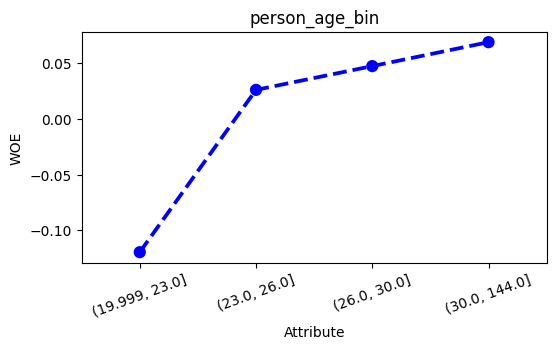

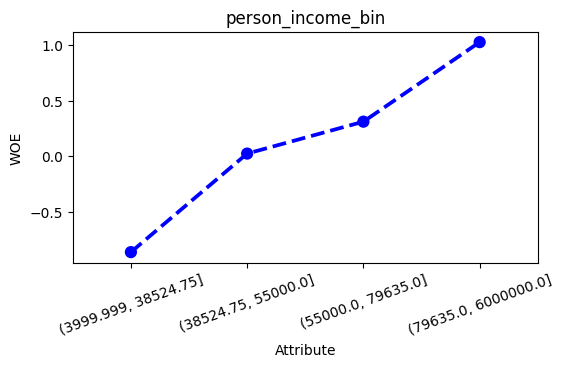

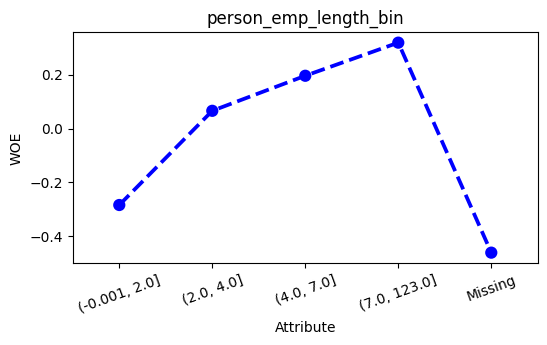

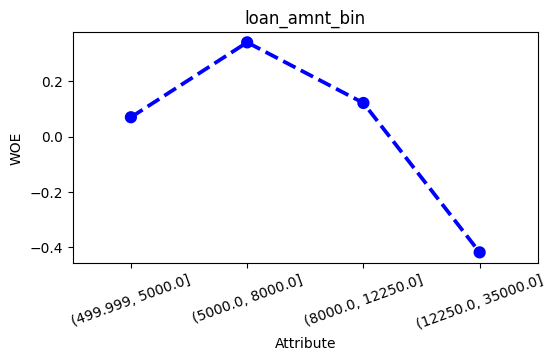

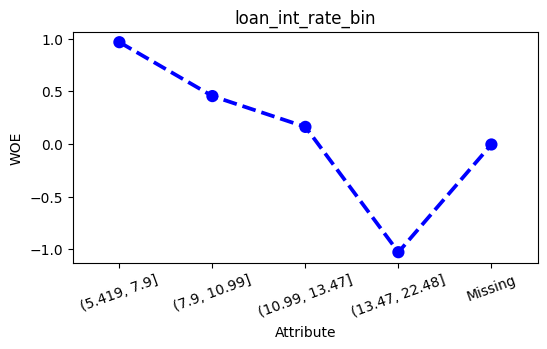

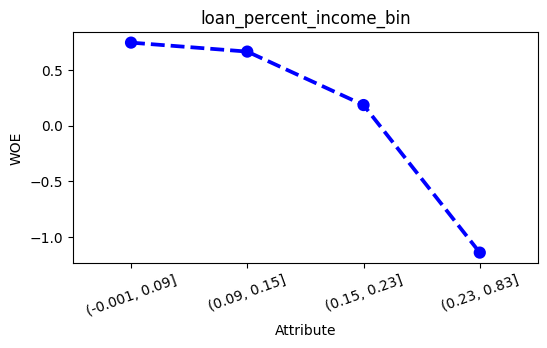

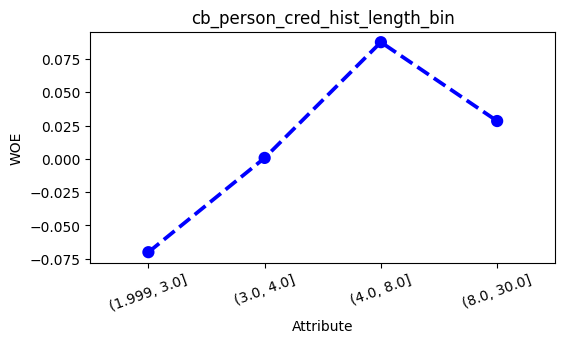

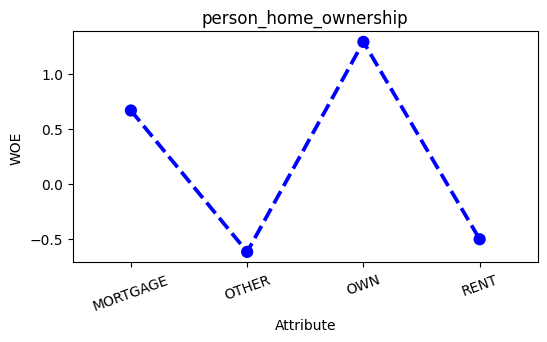

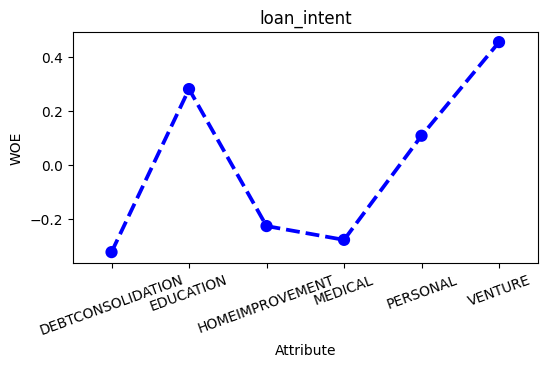

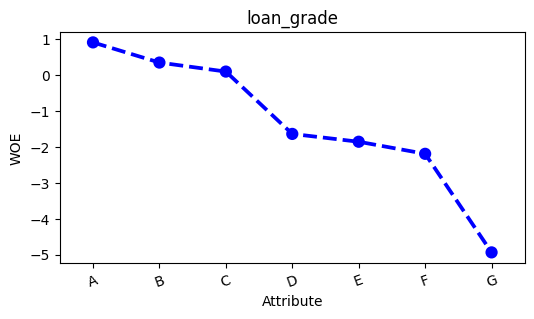

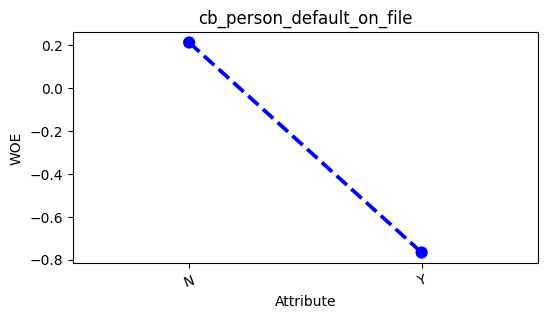

In [435]:
for char in char_list:

  crosstab = WOE_table[WOE_table['Characteristic'] == char]

  # Define the plot size and title
  plt.figure(figsize = (6,3))
  plt.title(char)

  # Plot the WOE
  sns.pointplot(x = crosstab['Attribute'],
                y = 'WOE',
                data = crosstab,
                markers = 'o',
                linestyles = '--',
                color = 'blue')

  # Rotate the label of x-axis
  plt.xticks(rotation = 20)

In [436]:
# Display the IV Table
IV_table

,Characteristic,Information Value,Strength
0,person_age_bin,0.005761,Unpredictive
1,person_income_bin,0.441132,Strong
2,person_emp_length_bin,0.064186,Weak
3,loan_amnt_bin,0.076986,Weak
4,loan_int_rate_bin,0.507604,Very strong
5,loan_percent_income_bin,0.606650,Very strong
6,cb_person_cred_hist_length_bin,0.003737,Unpredictive
7,person_home_ownership,0.386431,Strong
8,loan_intent,0.088282,Weak
9,loan_grade,0.858398,Very strong


In [437]:
# Import the libraries
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Create a function of independence test
def independence_test(data, characteristic_label, alpha=0.05):
    """
    Function to perform the independence test.

    Parameters
    ----------
    data : array like
      The name of dataset.

    characteristic_label : object
      The label of characteristic variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    Return
    ------
    res : dataframe
      The summary result of the independence test.

    """
    # Build the contingency table
    crosstab = pd.crosstab(data[characteristic_label],
                           data[response_variable],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        conclusion = 'Not Independent'
    else:
        conclusion = 'Independent'

    # Tabulate the results
    res = pd.DataFrame({'Characteristic': characteristic_label,
                        'Chi-stat': round(stat,2),
                        'P-value': pval,
                        'Conclusion': conclusion},
                       index = [0])

    return res

In [438]:
# Define initial table to summarize the test result
ind_table = pd.DataFrame({'Characteristic': [],
                        'Chi-stat': [],
                        'P-value': [],
                        'Conclusion': []})

# Perform independence test for all characteristics
for characteristic in char_list:

  # Perform the independence test
  test_result = independence_test(data = data_train_binned,
                                  characteristic_label = characteristic,
                                  alpha = 0.05)

  # # Append test result to the table
  ind_table = pd.concat((ind_table, test_result),
                        axis = 0,
                        ignore_index = True)

In [439]:
ind_table

,Characteristic,Chi-stat,P-value,Conclusion
0,person_age_bin,22.82,4.411133e-05,Not Independent
1,person_income_bin,1701.30,0.000000e+00,Not Independent
2,person_emp_length_bin,253.35,1.233544e-53,Not Independent
3,loan_amnt_bin,312.13,2.353494e-67,Not Independent
4,loan_int_rate_bin,2086.16,0.000000e+00,Not Independent
5,loan_percent_income_bin,2611.27,0.000000e+00,Not Independent
6,cb_person_cred_hist_length_bin,14.50,2.294776e-03,Not Independent
7,person_home_ownership,1362.16,4.790150e-295,Not Independent
8,loan_intent,335.51,2.306048e-70,Not Independent
9,loan_grade,3862.41,0.000000e+00,Not Independent


In [440]:
# Function to generate the WOE mapping dictionary
def get_woe_map_dict(WOE_table):

    # Initialize the dictionary
    WOE_map_dict = {}
    WOE_map_dict['Missing'] = {}

    unique_char = set(WOE_table['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (WOE_table
                            [WOE_table['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'WOE']])                 # Then select the attribute & WOE

        # Get the mapping
        WOE_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            woe = current_data.loc[idx, 'WOE']

            if attribute == 'Missing':
                WOE_map_dict['Missing'][char] = woe
            else:
                WOE_map_dict[char][attribute] = woe
                WOE_map_dict['Missing'][char] = np.nan

    # Validate data
    print('Number of key : ', len(WOE_map_dict.keys()))

    return WOE_map_dict

In [441]:
# Generate the WOE map dictionary
WOE_map_dict = get_woe_map_dict(WOE_table = WOE_table)
WOE_map_dict

Number of key :  12


{'Missing': {'person_income_bin': nan,
  'loan_percent_income_bin': nan,
  'loan_amnt_bin': nan,
  'loan_int_rate_bin': -0.005541156447753005,
  'person_home_ownership': nan,
  'person_age_bin': nan,
  'loan_intent': nan,
  'person_emp_length_bin': -0.4610580341267352,
  'loan_grade': nan,
  'cb_person_default_on_file': nan,
  'cb_person_cred_hist_length_bin': nan},
 'person_income_bin': {Interval(3999.999, 38524.75, closed='right'): -0.8624178362635031,
  Interval(38524.75, 55000.0, closed='right'): 0.0241091251033813,
  Interval(55000.0, 79635.0, closed='right'): 0.3111802352365003,
  Interval(79635.0, 6000000.0, closed='right'): 1.0268438508312738},
 'loan_percent_income_bin': {Interval(-0.001, 0.09, closed='right'): 0.7438394803684759,
  Interval(0.09, 0.15, closed='right'): 0.6634351422579503,
  Interval(0.15, 0.23, closed='right'): 0.18456707786222923,
  Interval(0.23, 0.83, closed='right'): -1.1375356872436029},
 'loan_amnt_bin': {Interval(499.999, 5000.0, closed='right'): 0.069

In [442]:
# Function to replace the raw data in the train set with WOE values
def transform_woe(raw_data, WOE_dict, num_cols):

    woe_data = raw_data.copy()

    # Map the raw data
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].map(WOE_map_dict[map_col])

    # Map the raw data if there is a missing value or out of range value
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].fillna(value=WOE_map_dict['Missing'][map_col])

    return woe_data

In [443]:
# Transform the X_train
woe_train = transform_woe(raw_data = X_train,
                          WOE_dict = WOE_map_dict,
                          num_cols = num_columns)

woe_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
11491,0.026104,0.311180,-0.506161,-0.284110,-0.323869,0.343137,0.121353,0.161476,0.184567,0.211359,-0.070043
3890,-0.119722,0.024109,0.665394,0.065751,0.281765,0.092115,0.069698,0.161476,0.663435,0.211359,0.000751
17344,0.026104,-0.862418,-0.506161,-0.284110,-0.323869,0.904584,0.121353,0.965882,-1.137536,0.211359,-0.070043
13023,0.026104,1.026844,-0.506161,-0.284110,-0.227074,0.343137,0.121353,0.454060,0.663435,0.211359,-0.070043
29565,0.068969,-0.862418,-0.506161,0.065751,-0.278307,0.343137,-0.419296,-0.005541,-1.137536,0.211359,0.028436
...,...,...,...,...,...,...,...,...,...,...,...
22095,0.068969,-0.862418,-0.506161,0.065751,0.456230,0.904584,0.340733,0.965882,0.184567,0.211359,0.087637
18736,0.047449,0.311180,-0.506161,-0.284110,-0.278307,0.092115,-0.419296,0.161476,-1.137536,0.211359,0.087637
1663,-0.119722,-0.862418,-0.506161,0.195896,0.281765,0.904584,0.069698,0.965882,0.743839,0.211359,-0.070043
18257,0.047449,1.026844,-0.506161,0.065751,-0.227074,-1.860620,-0.419296,-1.028861,0.184567,-0.766741,0.087637


In [444]:
# Transform the X_test
woe_test = transform_woe(raw_data = X_test,
                         WOE_dict = WOE_map_dict,
                         num_cols = num_columns)

woe_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28004,0.047449,0.311180,0.665394,0.065751,-0.278307,-1.642731,0.121353,-1.028861,0.184567,0.211359,0.028436
15942,0.026104,-0.862418,-0.506161,-0.461058,0.281765,0.904584,0.069698,0.965882,-1.137536,0.211359,-0.070043
26343,0.047449,1.026844,1.289619,0.195896,0.456230,0.092115,0.121353,-1.028861,0.663435,-0.766741,0.087637
16374,-0.119722,0.311180,0.665394,-0.284110,0.108485,0.092115,0.340733,0.161476,0.663435,0.211359,0.000751
27301,0.047449,1.026844,0.665394,0.318867,0.456230,0.904584,-0.419296,0.454060,0.663435,0.211359,0.028436
...,...,...,...,...,...,...,...,...,...,...,...
21232,0.047449,0.024109,0.665394,-0.284110,0.281765,0.092115,0.121353,-0.005541,-1.137536,-0.766741,0.028436
22172,0.068969,0.024109,-0.506161,0.195896,-0.278307,0.092115,0.340733,-1.028861,0.184567,-0.766741,0.028436
2214,0.026104,0.024109,-0.506161,0.065751,0.108485,0.343137,-0.419296,0.161476,-1.137536,0.211359,-0.070043
20705,0.068969,-0.862418,-0.506161,-0.284110,0.108485,0.904584,0.069698,0.454060,0.663435,0.211359,0.087637


In [445]:
# Rename the raw X_train for the future
raw_train = X_train
raw_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
11491,26,62000,RENT,1.0,DEBTCONSOLIDATION,B,10000,11.26,0.16,N,2
3890,23,39000,MORTGAGE,3.0,EDUCATION,C,5000,12.98,0.13,N,4
17344,24,35000,RENT,1.0,DEBTCONSOLIDATION,A,12000,6.54,0.34,N,2
13023,24,86000,RENT,1.0,HOMEIMPROVEMENT,B,12000,10.65,0.14,N,3
29565,42,38400,RENT,4.0,MEDICAL,B,13000,NaN,0.34,N,11
...,...,...,...,...,...,...,...,...,...,...,...
22095,32,38000,RENT,3.0,VENTURE,A,6350,5.79,0.17,N,6
18736,30,65000,RENT,0.0,MEDICAL,C,16000,13.06,0.25,N,8
1663,22,20000,RENT,7.0,EDUCATION,A,1675,7.74,0.08,N,3
18257,29,110000,RENT,4.0,HOMEIMPROVEMENT,E,24000,18.39,0.22,Y,8


In [446]:
# Define X_train
X_train = woe_train.to_numpy()
X_train

array([[ 2.61040647e-02,  3.11180235e-01, -5.06160619e-01, ...,
         1.84567078e-01,  2.11358543e-01, -7.00434604e-02],
       [-1.19721861e-01,  2.41091251e-02,  6.65393845e-01, ...,
         6.63435142e-01,  2.11358543e-01,  7.50971632e-04],
       [ 2.61040647e-02, -8.62417836e-01, -5.06160619e-01, ...,
        -1.13753569e+00,  2.11358543e-01, -7.00434604e-02],
       ...,
       [-1.19721861e-01, -8.62417836e-01, -5.06160619e-01, ...,
         7.43839480e-01,  2.11358543e-01, -7.00434604e-02],
       [ 4.74494851e-02,  1.02684385e+00, -5.06160619e-01, ...,
         1.84567078e-01, -7.66741401e-01,  8.76366128e-02],
       [-1.19721861e-01, -8.62417836e-01, -5.06160619e-01, ...,
        -1.13753569e+00,  2.11358543e-01,  7.50971632e-04]])

In [447]:
# Check y_train
y_train = y_train.to_numpy()
y_train

array([0, 0, 1, ..., 0, 0, 1])

In [448]:
# Import library
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [449]:
def forward(X, y, predictors, scoring='roc_auc', cv=5):
    """
    Function to perform forward selection procedure.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
      All predictors set.

    y : {array-like} of shape (n_sample, )
      The dependent or response variable.

    predictors : {array-like} of shape (n_sample, )
      Index of predictors

    scoring : a single {str}, default='roc_auc'
      The scoring parameter based on scikit-learn cross_validate documentation.

    cv : int, default=5
      Number of folds for k-Fold CV.

    Returns
    -------
    models : {array-like} of shape (n_combinations, k)
      Summary of predictors and its AIC score for each possible combination.

    best_model : {array-like} of shape (2, )
      Best model of models with the smallest AIC score.
    """

    # Initialize list of results
    results = []

    # Define sample size and  number of all predictors
    n_samples, n_predictors = X.shape

    # Define list of all predictors
    col_list = np.arange(n_predictors)

    # Define remaining predictors for each k
    remaining_predictors = [p for p in col_list if p not in predictors]

    # Initialize list of predictors and its CV Score
    pred_list = []
    score_list = []

    # Cross validate each possible combination of remaining predictors
    for p in remaining_predictors:
        combi = predictors + [p]

        # Extract predictors combination
        X_ = X[:, combi]
        y_ = y

        # Define the estimator
        model = LogisticRegression(penalty = None,
                                   class_weight = 'balanced')

        # Cross validate the recall scores of the model
        cv_results = cross_validate(estimator = model,
                                    X = X_,
                                    y = y_,
                                    scoring = scoring,
                                    cv = cv)

        # Calculate the average CV/recall score
        score_ = np.mean(cv_results['test_score'])

        # Append predictors combination and its CV Score to the list
        pred_list.append(list(combi))
        score_list.append(score_)

    # Tabulate the results
    models = pd.DataFrame({"Predictors": pred_list,
                           "Recall": score_list})

    # Choose the best model
    best_model = models.loc[models['Recall'].argmax()]

    return models, best_model

In [450]:
# Define predictor for the null model
predictor = []

# The predictor in the null model is zero values for all predictors
X_null = np.zeros((X_train.shape[0], 1))

# Define the estimator
model = LogisticRegression(penalty = None,
                           class_weight = 'balanced')

# Cross validate
cv_results = cross_validate(estimator = model,
                            X = X_null,
                            y = y_train,
                            cv = 10,
                            scoring = 'recall')

# Calculate the average CV/recall score
score_ = np.mean(cv_results['test_score'])

# Create table for the best model of each k predictors
# Append the results of null model
forward_models = pd.DataFrame({"Predictors": [predictor],
                               "Recall": [score_]})

In [451]:
forward_models

,Predictors,Recall
0,[],0.0


In [452]:
# Define list of predictors
predictors = []
n_predictors = X_train.shape[1]

# Perform forward selection procedure for k=1,...,11 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train,
                            y = y_train,
                            predictors = predictors,
                            scoring = 'recall',
                            cv = 10)

    # Tabulate the best model of each k predictors
    forward_models.loc[k+1] = best_model
    predictors = best_model['Predictors']

In [453]:
# Display the results
forward_models

,Predictors,Recall
0,[],0.000000
1,[2],0.736680
2,"[2, 9]",0.816880
3,"[2, 9, 0]",0.816880
4,"[2, 9, 0, 10]",0.816880
5,"[2, 9, 0, 10, 3]",0.784115
6,"[2, 9, 0, 10, 3, 7]",0.728643
7,"[2, 9, 0, 10, 3, 7, 1]",0.744121
8,"[2, 9, 0, 10, 3, 7, 1, 6]",0.766630
9,"[2, 9, 0, 10, 3, 7, 1, 6, 5]",0.781509


In [454]:
# Find the best Recall score
best_idx = forward_models['Recall'].argmax()
best_recall = forward_models['Recall'].loc[best_idx]
best_predictors = forward_models['Predictors'].loc[best_idx]

# Print the summary
print('Best index            :', best_idx)
print('Best Recall           :', best_recall)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(raw_train.columns[best_predictors].tolist())

Best index            : 2
Best Recall           : 0.8168803988590178
Best predictors (idx) : [2, 9]
Best predictors       :
['person_home_ownership', 'cb_person_default_on_file']


In [455]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = None,
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty=None)

In [456]:
best_model_intercept = pd.DataFrame({'Estimate': best_model.intercept_},
                                    index = ["Intercept"])
best_model_intercept

,Estimate
Intercept,0.000216


In [457]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Estimate':  np.reshape(best_model.coef_, best_idx)},
                                index = best_model_params)

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0)

best_model_summary

,Estimate
Intercept,0.000216
person_home_ownership,-0.996248
cb_person_default_on_file,-0.991864


In [458]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([1, 0, 1, ..., 1, 1, 1])

In [459]:
# Import metrics package
from sklearn.metrics import recall_score

In [460]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.8168844221105528

In [461]:
 #Predict the probability estimates
y_train_pred_proba = best_model.predict_proba(X_train_best)[:,[1]]
y_train_pred_proba

array([[0.57318012],
       [0.29477171],
       [0.57318012],
       ...,
       [0.57318012],
       [0.77988223],
       [0.57318012]])

<Axes: ylabel='Count'>

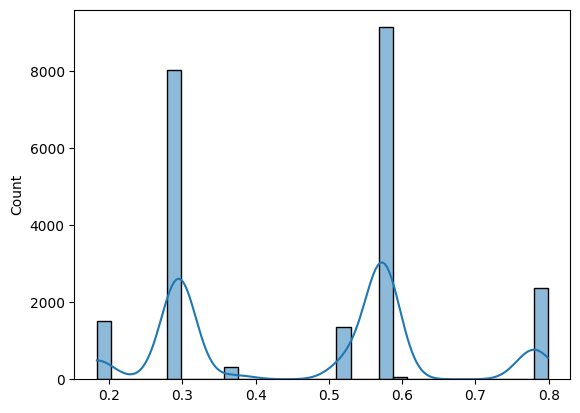

In [462]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_train_pred_proba,
                            y_train.shape[0]),
             kde = True)

In [463]:
# Rename the raw X_test for the future
raw_test = X_test

In [464]:
# Define X_test
X_test = woe_test.to_numpy()
X_test

array([[ 0.04744949,  0.31118024,  0.66539384, ...,  0.18456708,
         0.21135854,  0.02843558],
       [ 0.02610406, -0.86241784, -0.50616062, ..., -1.13753569,
         0.21135854, -0.07004346],
       [ 0.04744949,  1.02684385,  1.28961894, ...,  0.66343514,
        -0.7667414 ,  0.08763661],
       ...,
       [ 0.02610406,  0.02410913, -0.50616062, ..., -1.13753569,
         0.21135854, -0.07004346],
       [ 0.06896853, -0.86241784, -0.50616062, ...,  0.66343514,
         0.21135854,  0.08763661],
       [ 0.04744949,  0.31118024,  0.66539384, ..., -1.13753569,
         0.21135854,  0.08763661]])

In [465]:
y_test = y_test.to_numpy()
y_test

array([1, 1, 0, ..., 1, 0, 0])

In [466]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]

# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)
y_test_pred

array([0, 1, 0, ..., 1, 1, 0])

In [467]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.8124706985466479

In [468]:
# Predict the probability estimates
y_test_pred_proba = best_model.predict_proba(X_test_best)[:,[1]]
y_test_pred_proba

array([[0.29477171],
       [0.57318012],
       [0.37190316],
       ...,
       [0.57318012],
       [0.57318012],
       [0.29477171]])

In [469]:
best_predictors = forward_models['Predictors'].loc[len(predictors)]

In [470]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = None,
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty=None)

In [471]:
best_model_intercept = pd.DataFrame({'Characteristic': 'Intercept',
                                     'Estimate': best_model.intercept_})
best_model_intercept

,Characteristic,Estimate
0,Intercept,-0.059463


In [472]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Characteristic':  best_model_params,
                                 'Estimate':        np.reshape(best_model.coef_,
                                                               len(best_predictors))})

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0,
                               ignore_index = True)

best_model_summary

,Characteristic,Estimate
0,Intercept,-0.059463
1,person_home_ownership,-0.749994
2,cb_person_default_on_file,0.017819
3,person_age,-0.057122
4,cb_person_cred_hist_length,-0.569405
5,person_emp_length,-0.249803
6,loan_int_rate,0.008703
7,person_income,-0.977773
8,loan_amnt,-0.855171
9,loan_grade,-1.156946


In [473]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([0, 0, 1, ..., 0, 1, 1])

In [474]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.7993969849246231

In [475]:
from sklearn import metrics

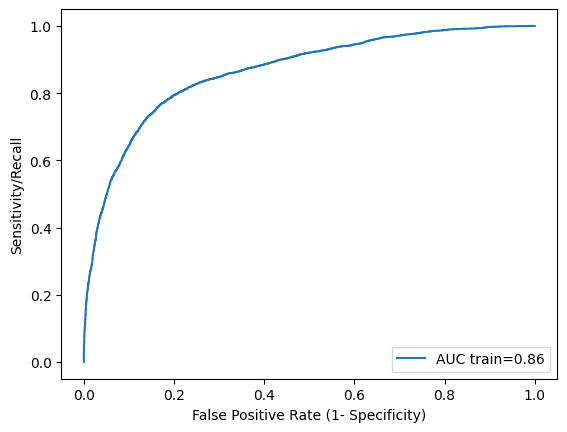

In [476]:
# Predict probability of default on X_train
y_train_pred_proba = best_model.predict_proba(X_train_best)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr, tpr, threshold = metrics.roc_curve(y_true = y_train,
                                        y_score = y_train_pred_proba[:,1])

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc_train = metrics.roc_auc_score(y_true = y_train,
                                  y_score = y_train_pred_proba[:,1])
auc_train = round(auc_train, 2)

# Plot ROC and its AUC
plt.plot(fpr,
         tpr,
         label = "AUC train="+str(auc_train))

plt.ylabel("Sensitivity/Recall")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

In [477]:
import scikitplot as skplt

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

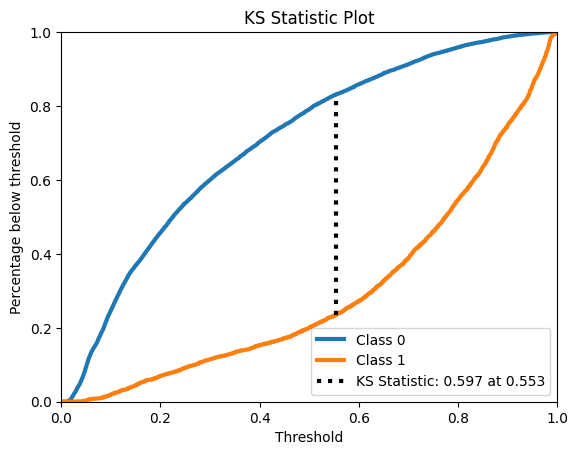

In [478]:
skplt.metrics.plot_ks_statistic(y_train,
                                y_train_pred_proba)

In [479]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]

# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)
y_test_pred

array([1, 1, 0, ..., 1, 0, 1])

In [480]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.8049695264885138

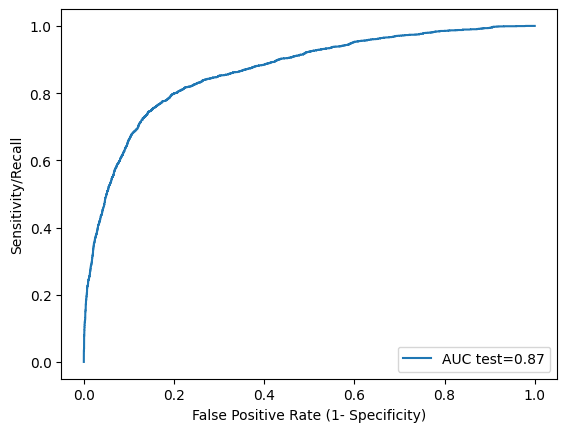

In [481]:
# Predict probability of default on X_test
y_test_pred_proba = best_model.predict_proba(X_test_best)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr_, tpr_, threshold_ = metrics.roc_curve(y_true = y_test,
                                           y_score = y_test_pred_proba[:,1])

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc_test = metrics.roc_auc_score(y_true = y_test,
                                 y_score = y_test_pred_proba[:,1])
auc_test = round(auc_test, 2)

# Plot ROC and its AUC
plt.plot(fpr_,
         tpr_,
         label = "AUC test="+str(auc_test))

plt.ylabel("Sensitivity/Recall")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

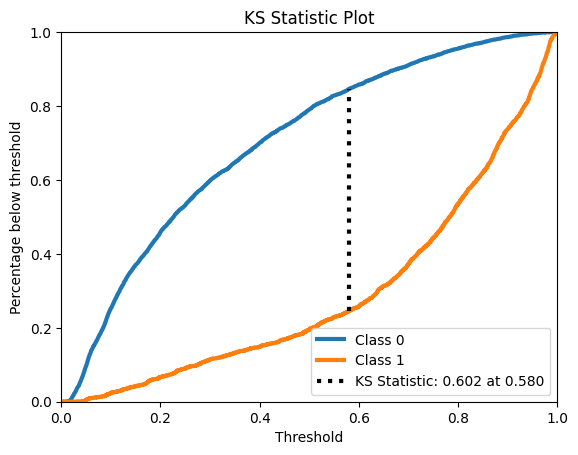

In [482]:
# Plot KS Statistic
skplt.metrics.plot_ks_statistic(y_test,
                                y_test_pred_proba)

In [483]:
# Define Factor and Offset
factor = 80/np.log(2)
offset = 1000 - factor*np.log(35)

print(f"Offset = {offset:.2f}")
print(f"Factor = {factor:.2f}")

Offset = 589.66
Factor = 115.42


In [484]:
# Define n = number of characteristics
n = len(best_predictors)

# Define b0
b0 = best_model.intercept_[0]

print(f"n = {n}")
print(f"b0 = {b0:.4f}")

n = 11
b0 = -0.0595


In [485]:
# Adjust characteristic name in best_model_summary_table
for col in best_model_summary['Characteristic']:
  if col in num_columns:
    bin_col = col + '_bin'
  else:
    bin_col = col
  best_model_summary.replace(col, bin_col, inplace = True)


# Merge tables to get beta_i for each characteristic
scorecards = pd.merge(left = WOE_table,
                      right = best_model_summary,
                      how = 'left',
                      on = ['Characteristic'])

scorecards.head()

,Characteristic,Attribute,WOE,Estimate
0,person_age_bin,"(19.999, 23.0]",-0.119722,-0.057122
1,person_age_bin,"(23.0, 26.0]",0.026104,-0.057122
2,person_age_bin,"(26.0, 30.0]",0.047449,-0.057122
3,person_age_bin,"(30.0, 144.0]",0.068969,-0.057122
4,person_income_bin,"(3999.999, 38524.75]",-0.862418,-0.977773


In [486]:
# Define beta and WOE
beta = scorecards['Estimate']
WOE = scorecards['WOE']

# Calculate the score point for each attribute
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))
scorecards['Points'] = scorecards['Points'].astype('int')

scorecards

,Characteristic,Attribute,WOE,Estimate,Points
0,person_age_bin,"(19.999, 23.0]",-0.119722,-0.057122,53
1,person_age_bin,"(23.0, 26.0]",0.026104,-0.057122,54
2,person_age_bin,"(26.0, 30.0]",0.047449,-0.057122,54
3,person_age_bin,"(30.0, 144.0]",0.068969,-0.057122,54
4,person_income_bin,"(3999.999, 38524.75]",-0.862418,-0.977773,-43
5,person_income_bin,"(38524.75, 55000.0]",0.024109,-0.977773,56
6,person_income_bin,"(55000.0, 79635.0]",0.311180,-0.977773,89
7,person_income_bin,"(79635.0, 6000000.0]",1.026844,-0.977773,170
8,person_emp_length_bin,"(-0.001, 2.0]",-0.284110,-0.249803,46
9,person_emp_length_bin,"(2.0, 4.0]",0.065751,-0.249803,56


In [487]:
grouped_char = scorecards.groupby('Characteristic')
grouped_points = grouped_char['Points'].agg(['min', 'max'])
grouped_points

,min,max
Characteristic,,
cb_person_cred_hist_length_bin,49,59
cb_person_default_on_file,53,55
loan_amnt_bin,12,87
loan_grade,-605,175
loan_int_rate_bin,53,55
loan_intent,7,120
loan_percent_income_bin,-46,119
person_age_bin,53,54
person_emp_length_bin,40,63


In [488]:
 # Calculate the min and max score from the scorecards
total_points = grouped_points.sum()
min_score = total_points['min']
max_score = total_points['max']


In [489]:
print(f"Min score = {min_score}")
print(f"Max score = {max_score}")

Min score = -427
Max score = 1122
